---
# `Telecom Customer Churn Dataset`
---

### Initial Exploration

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('data/telecom-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
print(df.shape)

(7043, 21)


#### There are around 7000 row entries and 21 columns (features) with one of them being `customerID` (dropping it since it is useless for analysis)

In [92]:
df = df.drop(['customerID'], axis=1)

In [76]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### The column `SeniorCitizen` should be a Categorical column, also replacing the 1 and 0 values in this column to `'True'` and `'False'` respectively

In [93]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'True', 0:'False'})

#### The column `TotalCharges` should be a Numerical column (`float64`) instead of object type 

In [94]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

---
#### Separating the categorical and numerical columns

In [95]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

#### Observing the categorical columns

In [96]:
for col in cat_cols:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: ['False' 'True']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Observing the numerical columns

In [97]:
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


---
## Pre Processing

In [100]:
df.isna().sum().sort_values(ascending=False)

TotalCharges        11
gender               0
SeniorCitizen        0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
Churn                0
dtype: int64

In [101]:
df.loc[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,False,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### The column `TotalCharges` has 11 Missing/NULL values, replacing these with 0
#### TotalCharges = tenure x MonthlyCharges (tenure is 0 for these rows anyways)

In [102]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [103]:
df.isna().sum().sort_values(ascending=False)

gender              0
SeniorCitizen       0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
Churn               0
dtype: int64

#### No more Missing/NULL values remaining in the dataset

---
## Feature Encoding

In [113]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} categories")

gender: 2 categories
SeniorCitizen: 2 categories
Partner: 2 categories
Dependents: 2 categories
PhoneService: 2 categories
MultipleLines: 3 categories
InternetService: 3 categories
OnlineSecurity: 3 categories
OnlineBackup: 3 categories
DeviceProtection: 3 categories
TechSupport: 3 categories
StreamingTV: 3 categories
StreamingMovies: 3 categories
Contract: 3 categories
PaperlessBilling: 2 categories
PaymentMethod: 4 categories
Churn: 2 categories


---
## Exploratory Data Analysis (EDA)

### Numerical Feature Distribution

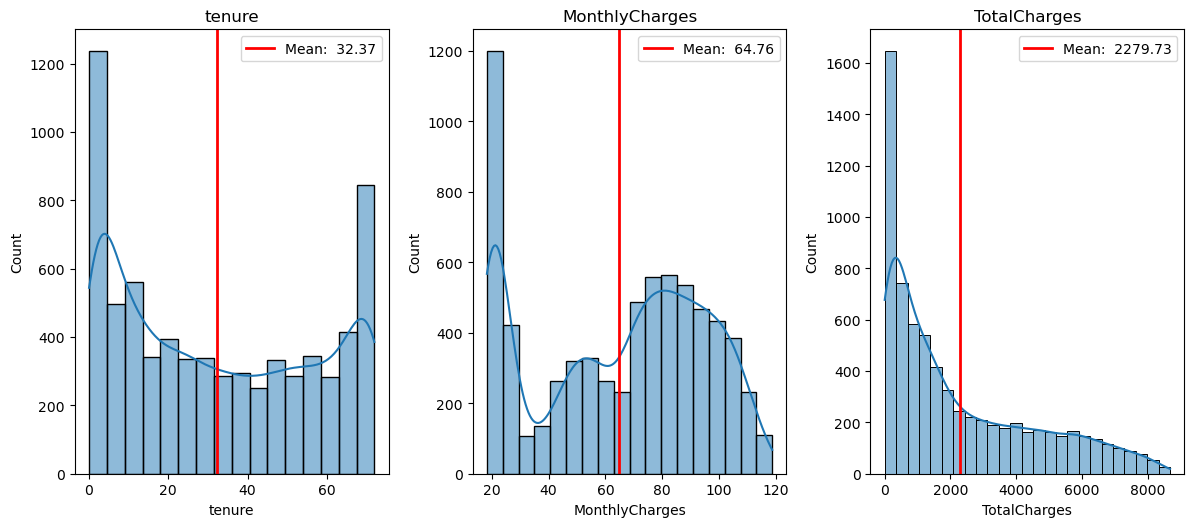

In [112]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 3:
        ax = plt.subplot(3, 5, plotnumber)

        sns.histplot(df[column], kde=True, ax=ax)

        mean_value = df[column].mean()

        plt.axvline(mean_value, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_value: .2f}')

        plt.title(column)
        plt.legend()
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

### Categorical Feature Distribution

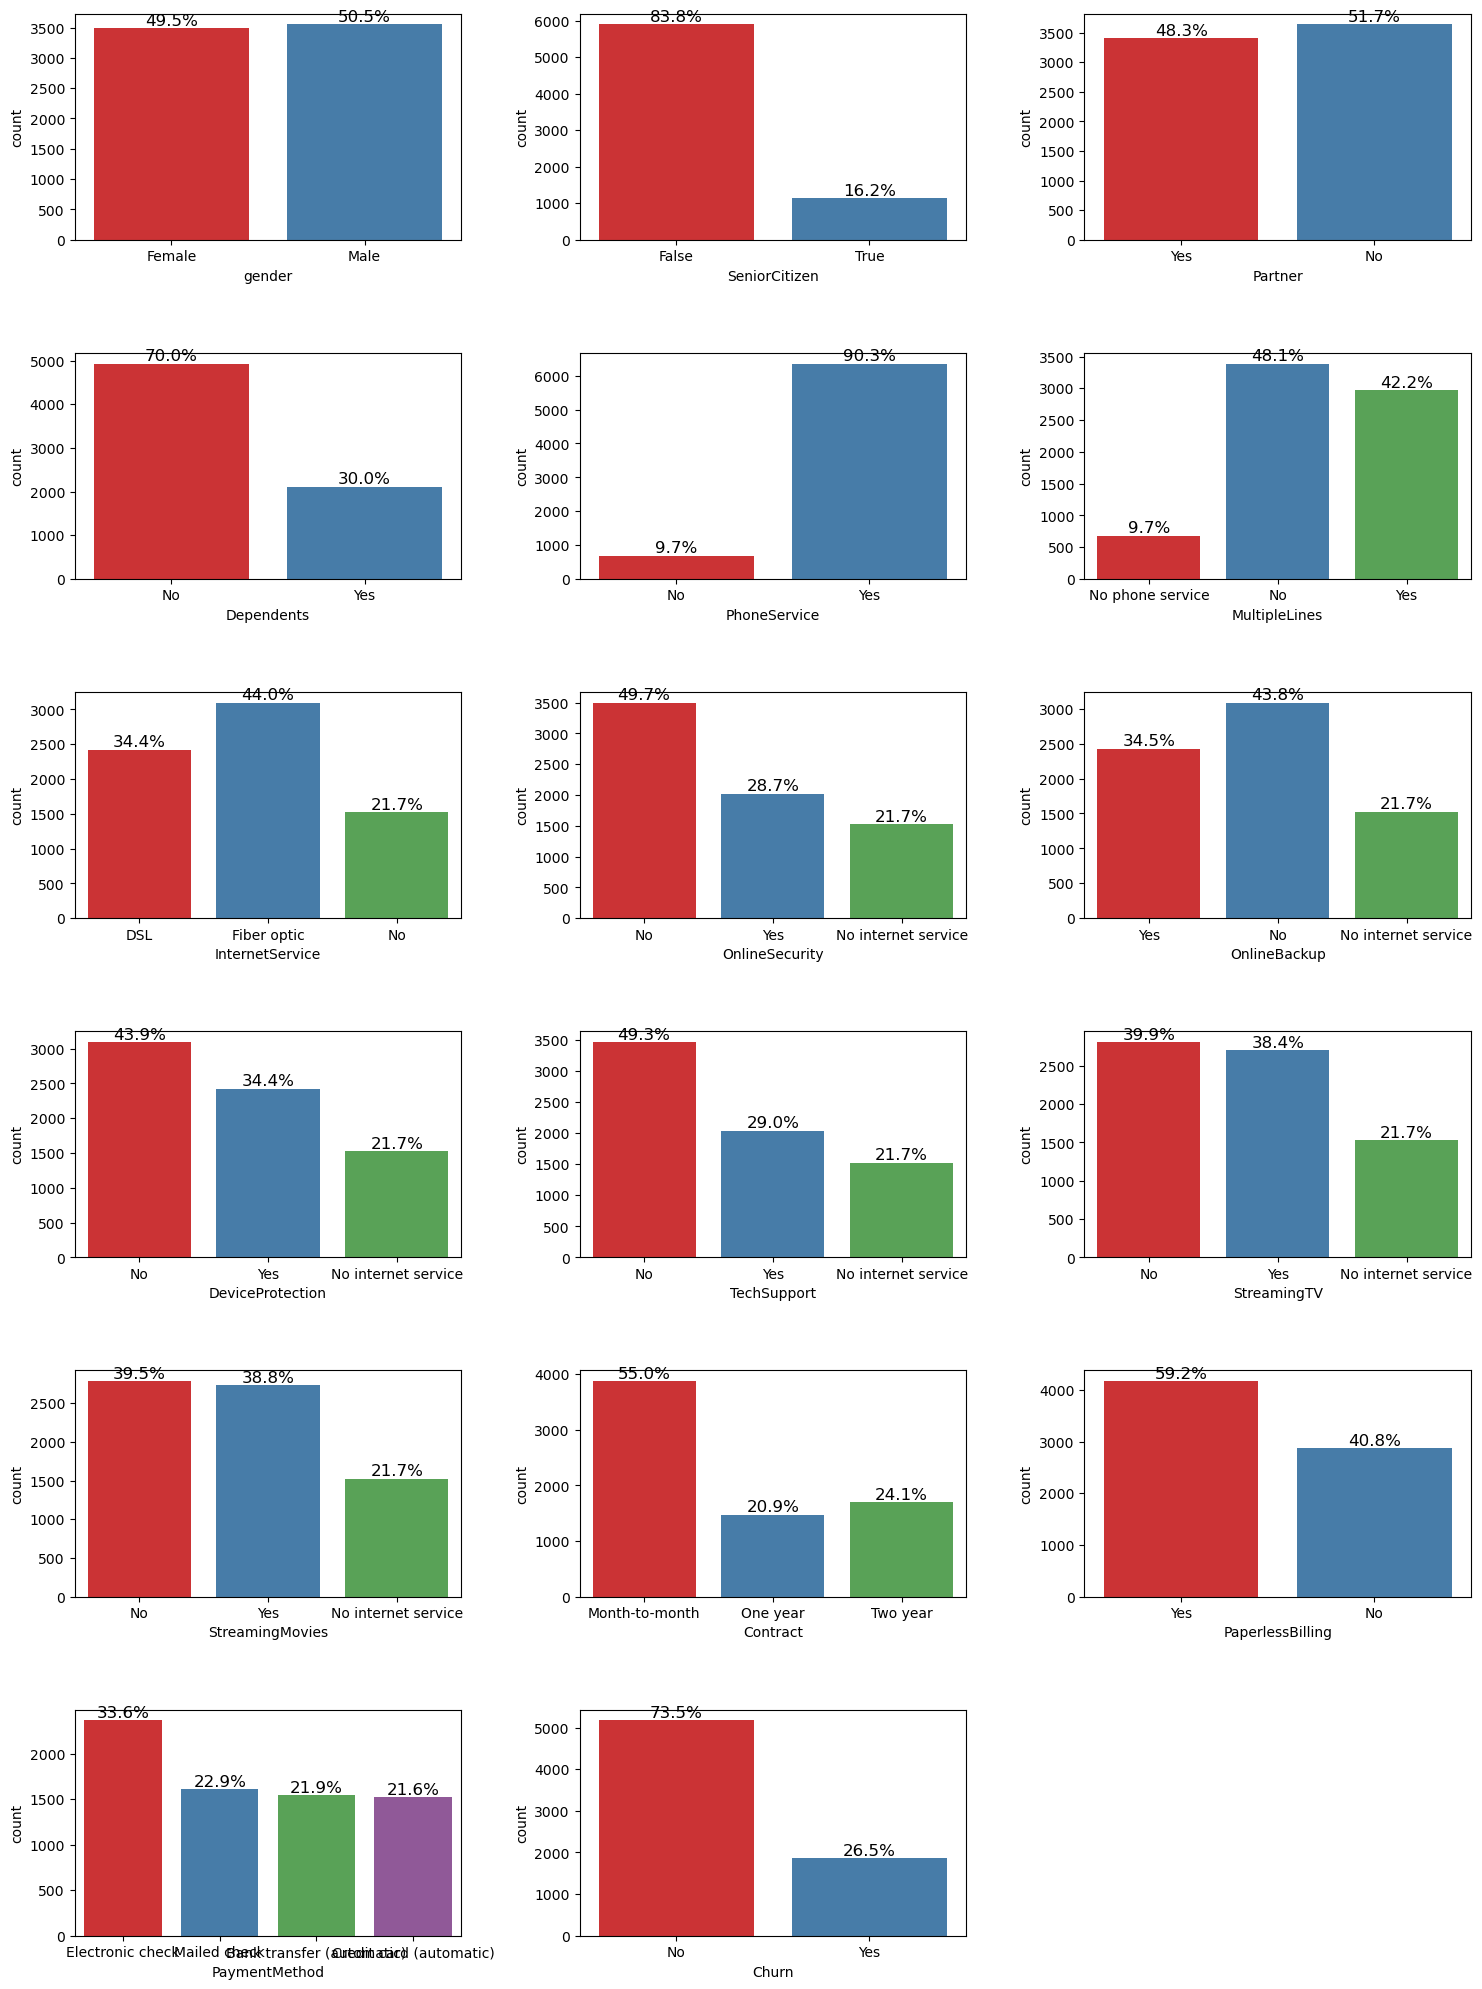

In [122]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 17:
        ax = plt.subplot(6, 3, plotnumber)

        total = len(df[column])
        sns.countplot(x=df[column], palette='Set1', ax=ax)

        for p in ax.patches:
            ax.annotate(
                f'{p.get_height()/total:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12
            )

        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()